In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rcParams
import math

rcParams['figure.dpi']=150

## Medidas eléctricas-Comprobacion de proporcionalidad entre intensidad y voltaje:

In [2]:
#cargamos dos tomas de datos de voltaje e intensidad:

datos_V_I_1 = np.loadtxt('datos_V_I_1.txt', comments='%')
datos_V_I_2 = np.loadtxt('datos_V_I_2.txt', comments='%')
#Primera toma:
voltaje_1 = datos_V_I_1[:,0]
intensidad_1 = datos_V_I_1[:,1]

#Segunda toma:
voltaje_2 = datos_V_I_2[:,0]
intensidad_2 = datos_V_I_2[:,1]

In [3]:
# Veamos la proporcionalidad de la ley de ohm para ver como se comportan
#nuestros datos:

## Primera toma:

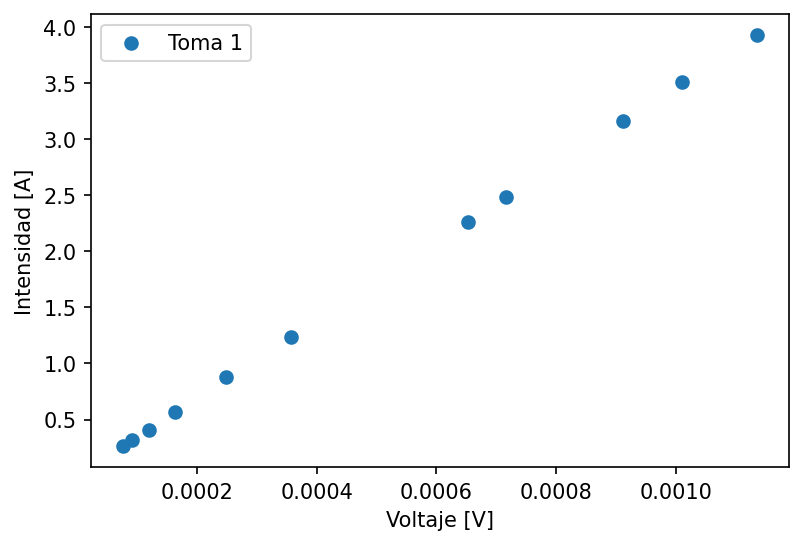

In [4]:
plt.scatter(voltaje_1, intensidad_1, label='Toma 1')

plt.ylabel('Intensidad [A]')
plt.xlabel('Voltaje [V]')
plt.legend()

plt.show()

In [5]:
# Vamos a realizar un ajuste lineal para determinar la pendiente (1/R) y 
# comprobar con el calculo directo a partir de la media de los datos 
# 1/R_media=(I/V)_media

In [6]:
def ohm(x,a):
    return a*x

In [7]:
popt, pcov = curve_fit(ohm, voltaje_1, intensidad_1)
perr = np.sqrt(np.diag(pcov))

In [8]:
print(popt)
print(perr)

[3466.68237517]
[3.53912707]


In [9]:
pendiente_1 = popt
s_pendiente_1 = perr
print(pendiente_1)
print(s_pendiente_1)

[3466.68237517]
[3.53912707]


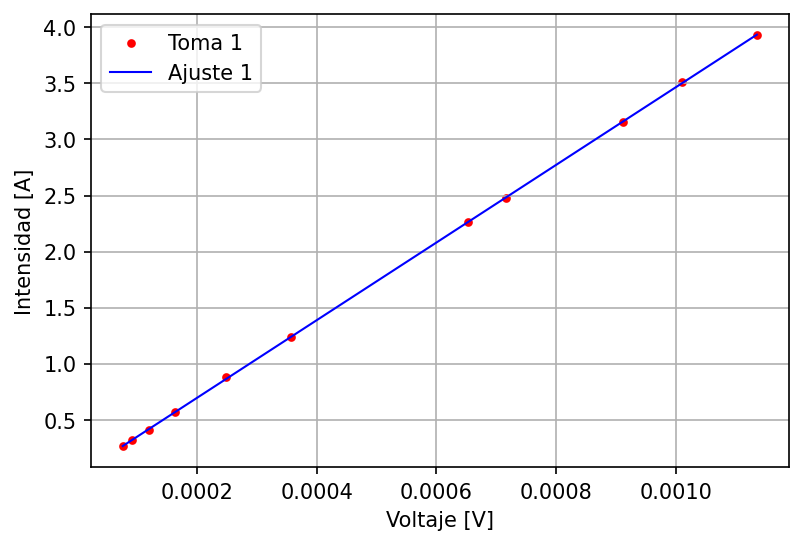

In [10]:
plt.scatter(voltaje_1, intensidad_1,s=10, c='r', label='Toma 1')

plt.plot(voltaje_1, ohm(voltaje_1, *popt), c='b', linewidth= 1, label='Ajuste 1')

plt.ylabel('Intensidad [A]')
plt.xlabel('Voltaje [V]')
plt.legend()
plt.grid()
plt.savefig('ajusteIV_1.pdf')
plt.show()

In [11]:
# Calculemos ahora el cociente I/V
def cociente(y,x):
    return y/x

In [12]:
inv_resistencia_1 = cociente(intensidad_1,voltaje_1)

In [13]:
media_inv_res_1 = np.mean(inv_resistencia_1)
s_media_inv_res_1 = np.std(inv_resistencia_1)
print(media_inv_res_1)
print(s_media_inv_res_1)

3466.3391837860545
33.3054370470523


### Obtenemos por tanto de la primera toma de datos:

---> Del ajuste:

$(\frac{1}{R})_{ajuste1}=3466.68(3.54)[\Omega^-1]$

---> De la media:
    
$(\frac{1}{R})_{media1}=3466.34(33.30)[\Omega^-1]$

## Segunda toma:

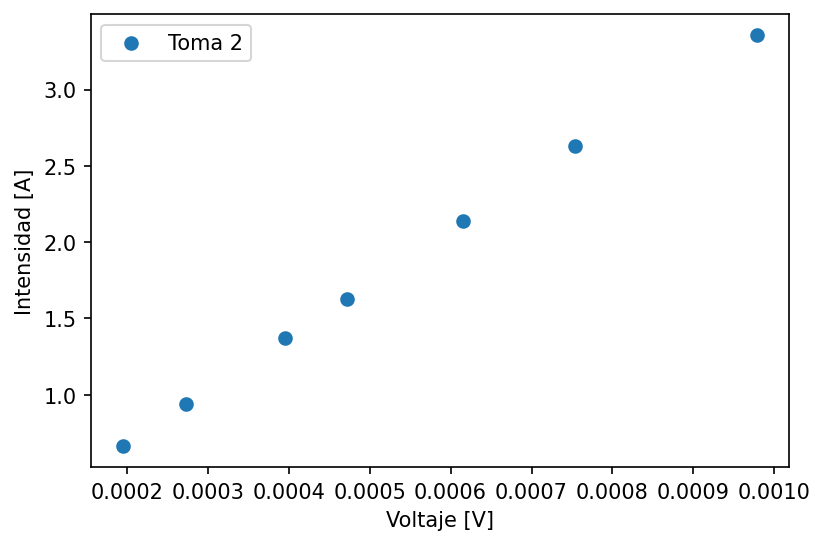

In [14]:
plt.scatter(voltaje_2, intensidad_2, label='Toma 2')

plt.ylabel('Intensidad [A]')
plt.xlabel('Voltaje [V]')
plt.legend()

plt.show()

In [15]:
# Vamos a realizar un ajuste lineal para determinar la pendiente (1/R) y 
# comprobar con el calculo directo a partir de la media de los datos 
# 1/R_media=(I/V)_media

In [16]:
popt, pcov = curve_fit(ohm, voltaje_2, intensidad_2)
perr = np.sqrt(np.diag(pcov))

In [17]:
pendiente_2 = popt
s_pendiente_2 = perr
print(pendiente_2)
print(s_pendiente_2)

[3458.79009462]
[10.44396538]


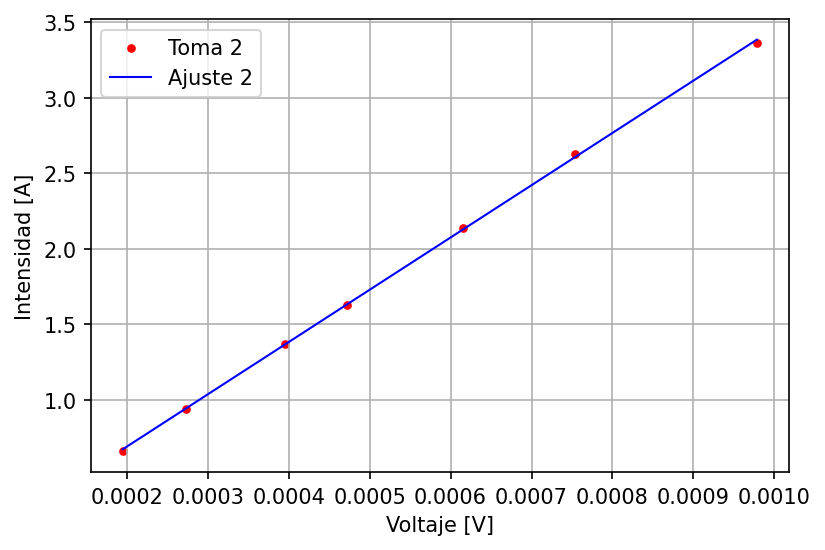

In [18]:
plt.scatter(voltaje_2, intensidad_2,s=10, c='r', label='Toma 2')

plt.plot(voltaje_2, ohm(voltaje_2, *popt), c='b', linewidth= 1, label='Ajuste 2')

plt.ylabel('Intensidad [A]')
plt.xlabel('Voltaje [V]')
plt.legend()
plt.grid()
plt.savefig('ajusteIV_2.pdf')
plt.show()

In [19]:
inv_resistencia_2 = cociente(intensidad_2,voltaje_2)

In [20]:
media_inv_res_2 = np.mean(inv_resistencia_2)
s_media_inv_res_2 = np.std(inv_resistencia_2)
print(media_inv_res_2)
print(s_media_inv_res_2)

3451.1872469927584
33.094183008407676


### Obtenemos por tanto de la segunda toma de datos:

---> Del ajuste:

$(\frac{1}{R})_{ajuste2}=3458.79(10.44)[\Omega^-1]$

---> De la media:
    
$(\frac{1}{R})_{media2}=3451.19(33.09)[\Omega^-1]$

### Podemos concluir que segun el analisis realizado para distintas corrientes el resultado muestra una proporcionalidad entre intensidad y corriente estricta.

## Digitalización

Parametrizamos la geometría de la placa en Datathief. Hemos digitalizado los tornillos como circulos. Acabado el proceso obtenemos los datos de las coordenadas que utilizaremos en el simulador

## Simulación FEM

Utilizaremos el programa Agros2d que nos permite resolver la ecuación de Poisson discretizando el dominio continuo, es decir, irá resolviendo el sistema por partes, dado que la geometría de la placa utilizada es irregular.

Para las dos tomas de datos obtendremos de Agros2d los valores para $V_{sim}$ y $\sigma_{sim}$, para ello hemos utilizado el valor $I_{exp}$ más cercano al cociente $(I/V)_{media}$ para ambas tomas.
El área utilizada en el cálculo de la densidad de corriente la hemos obtenido multiplicando la distancia de arco de la circunferencia(tornillo) por el espesor de la placa (0.1cm)

In [21]:
# Datos obtenidos:

# Espesor [cm]:
espesor = 0.1

# radio tornillo [cm]
radio_tornillo = 0.3669
dist_arco = 0.581195

# conductividad simulación [S/cm]:
sigma_sim = 3E5

Para el cálculo de la densidad de corriente hemos tenido en cuenta un factor 1/4 debido a que el circulo está dividido en 4 arcos y por tanto tenemos que repartir la I_exp entre los 4.

In [22]:
# Densidad de corriente [A/cm^2]:

def dens_corr(i,j,k):
    return (i/(j*k))

## Primera toma:

In [23]:
# Intensidad experimental [A]
I_exp_1 = 3.16
si = 0.01
# Voltaje experimental [V]
V_exp_1 = 0.000912
sv = 1*(10**-6)
#cociente I/V y su incertidumbre

R_1 = I_exp_1 / V_exp_1
sR_1 = np.sqrt( ((1/(V_exp_1))**2)*(si**2) + ((I_exp_1/(V_exp_1**2))**2)*(sv**2) )

print(R_1)
print(sR_1)

3464.9122807017543
11.604463404137478


In [24]:
densidad_corriente_1 = dens_corr(I_exp_1,espesor,dist_arco)
densidad_corriente_1_4 = densidad_corriente_1/4

In [25]:
print(densidad_corriente_1)
print(densidad_corriente_1_4)

54.370736155679246
13.592684038919812


In [26]:
# Obteniendo la diferencia de potencial simulada:

Punto_3_toma1 = 0.0003261
Punto_4_toma1 = 0.0001843

dif_pot_1_sim = Punto_3_toma1 - Punto_4_toma1

print(dif_pot_1_sim)

0.0001418


In [27]:
# Obtencion de la conductividad experimental del material:

def conductividad(i,j,k):
    return (i*j)/k

In [28]:
cond_exp_toma1 = conductividad(dif_pot_1_sim,sigma_sim,V_exp_1)
print(cond_exp_toma1)

46644.73684210526


#### Hemos obtenido de la primera toma de datos tras la simulación un valor experimental para la conductividad electrica:
.


$\sigma_{exp_1} = 46644.74 [S / cm]$

In [29]:
rho_exp1 = 1/cond_exp_toma1
print(rho_exp1)

2.143864598025388e-05


### Por tanto la resistividad eléctrica :
$\rho_{exp_1} = 1/\sigma_{exp_1}$

$\rho_{exp_1} = 2.144*10^{-5} [\Omega  cm]$

## Segunda toma:

In [30]:
# Intensidad experimental [A]
I_exp_2 = 1.63

# Voltaje experimental [V]
V_exp_2 = 0.0004715

#cociente I/V y su incertidumbre

R_2 = I_exp_2 / V_exp_2
sR_2 = np.sqrt( ((1/(V_exp_2))**2)*(si**2) + ((I_exp_2/(V_exp_2**2))**2)*(sv**2) )

print(R_2)
print(sR_2)

3457.0519618239655
22.44050859051275


In [31]:
densidad_corriente_2 = dens_corr(I_exp_2,espesor,dist_arco)
densidad_corriente_2_4 = densidad_corriente_2/4

In [32]:
print(densidad_corriente_2)
print(densidad_corriente_2_4)

28.0456645359991
7.011416133999775


In [33]:
# Obteniendo la diferencia de potencial simulada:

Punto_3_toma2 = 0.0001645
Punto_4_toma2 = 0.00009133

dif_pot_2_sim = Punto_3_toma2 - Punto_4_toma2

print(dif_pot_2_sim)

7.316999999999999e-05


In [34]:
cond_exp_toma2 = conductividad(dif_pot_2_sim,sigma_sim,V_exp_2)
print(cond_exp_toma2)

46555.67338282077


### Hemos obtenido de la segunda toma de datos tras la simulación un valor experimental para la conductividad electrica:
.


$\sigma_{exp_2} = 46555.67 [S / cm]$

In [35]:
rho_exp2 = 1/cond_exp_toma2
print(rho_exp2)

2.147965924103686e-05


### Por tanto la resistividad eléctrica :
$\rho_{exp_2} = 1/\sigma_{exp_2}$

$\rho_{exp_2} = 2.148*10^{-5} [\Omega  cm]$

### Para este último valor de la resistividad comprobamos si el programa nos devuelve valores para el potencial cercamos a los experimentales:

In [36]:
# Para cond_exp_toma2


In [37]:
# Obtenemos:

Punto_3_sim = 0.0001645
Punto_4_sim = 0.00009133

dif_pot_sim = Punto_3_sim - Punto_4_sim
print(dif_pot_sim)

V_exp_comp = (dif_pot_sim*sigma_sim)/cond_exp_toma2
print(V_exp_comp)

7.316999999999999e-05
0.0004715000000000001


Comparando:

$\Delta_{V_{exp}} = 0.0004715$ [V]
    
$\Delta_{V_{sim}} \approx 0.0004715$ [V]
    
Como cabía esperar 
$\Delta_{V_{exp}}= \Delta_{V_{sim}}$

## Repetiremos la simulación variando el radio de los circulos:

In [38]:
# Tendremos ahora para el área:

# radio tornillo [cm]
radio_tornillo = 0.35

#distancia arco en [cm]
dist_arco_2 = 0.549779

# Utilizando:

# Intensidad experimental [A]
I_exp_2 = 1.63

# Voltaje experimental [V]
V_exp_2 = 0.0004715

densidad_corriente_var= dens_corr(I_exp_2,espesor,dist_arco_2)
print('Densidad corriente total=',densidad_corriente_var)

densidad_corriente_var_4 = densidad_corriente_var/4
print('densidad de corriente/4=',densidad_corriente_var_4)

# Obteniendo la diferencia de potencial simulada:

Punto_3_var = 1.653E-4
Punto_4_var = 0.9209E-4

dif_pot_var_sim = Punto_3_var - Punto_4_var
print('Diferencia de potencial=',dif_pot_var_sim)

cond_exp_var = conductividad(dif_pot_var_sim,sigma_sim,V_exp_2)
print('Conductividad 2=', cond_exp_var)

Densidad corriente total= 29.64827685306277
densidad de corriente/4= 7.412069213265693
Diferencia de potencial= 7.321000000000001e-05
Conductividad 2= 46581.124072110295


### Obteniendo un valor cercano al de la toma 2: 

$\sigma_{var} = 46581.12 [S / cm]$

In [39]:
rho_exp_var = 1/cond_exp_var
print(rho_exp_var)

2.146792332559304e-05


### Por tanto la resistividad eléctrica :
$\rho_{exp_{var}} = 1/\sigma_{exp_{var}}$

$\rho_{exp_{var}} = 2.147*10^{-5} [\Omega  cm]$

## Cambio en la configuracion de inyeccion de corriente en Agros2d

In [40]:
# Tendremos ahora para el área:

#distancia arco en [cm]
dist_arco_3 = 0.55763

# Utilizando:

# Intensidad experimental [A]
I_exp_2 = 1.63

# Voltaje experimental [V]
V_exp_2 = 0.0004715

densidad_corriente_var_3 = dens_corr(I_exp_2,espesor,dist_arco_3)
print('Densidad corriente total=',densidad_corriente_var_3)

densidad_corriente_var_4_3 = densidad_corriente_var_3/4
print('densidad de corriente/4=',densidad_corriente_var_4_3)

# Obteniendo la diferencia de potencial simulada:

dif_pot_var_sim_3 = 72.76e-6
print('Diferencia de potencial 3=',dif_pot_var_sim_3)

cond_exp_var_3 = conductividad(dif_pot_var_sim_3,sigma_sim,V_exp_2)
print('Conductividad 3=', cond_exp_var_3)

#Para dos longitudes de arco:
densidad_corriente_var_4_4 = densidad_corriente_var_3/2
print('densidad de corriente/4=',densidad_corriente_var_4_3)
dif_pot_var_sim_4 = 72.8e-6
print('Diferencia de potencial 4=',dif_pot_var_sim_4)
cond_exp_var_4 = conductividad(dif_pot_var_sim_4,sigma_sim,V_exp_2)
print('Conductividad 4=', cond_exp_var_4)


Densidad corriente total= 29.230851998637085
densidad de corriente/4= 7.307712999659271
Diferencia de potencial 3= 7.276e-05
Conductividad 3= 46294.80381760339
densidad de corriente/4= 7.307712999659271
Diferencia de potencial 4= 7.28e-05
Conductividad 4= 46320.254506892896


# El material que corresponde a esta resistividad electrica es el plomo

In [45]:
#Vamos a estimar un error para la conductividad realizando una media a partir de los valores obtenidos

cond_lista = [cond_exp_toma1, cond_exp_toma2, cond_exp_var, cond_exp_var_3, cond_exp_var_4]

conductividad_media = np.mean(cond_lista)
s_conductividad_media = np.std(cond_lista)
print('media')
print(conductividad_media)
print('incertidumbre')
print(s_conductividad_media)


#Para la resistividad

rho_media = 1/conductividad_media
s_rho_media = s_conductividad_media /(conductividad_media)**2

print('media')
print(rho_media)
print('incertidumbre')
print(s_rho_media)


media
46479.31852430652
incertidumbre
143.46058167401088
media
2.1514945393983057e-05
incertidumbre
6.640688114416458e-08
